<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [8]:
#read the output file
df = pd.read_csv("output.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163001 entries, 0 to 163000
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 163001 non-null  int64  
 1   n                     163001 non-null  int64  
 2   m                     163001 non-null  int64  
 3   Distribution          163001 non-null  object 
 4   OPT                   163001 non-null  object 
 5   Plurality             163001 non-null  object 
 6   Plurality Distortion  163001 non-null  float64
 7   Copeland              163001 non-null  object 
 8   Copeland Distortion   163001 non-null  float64
 9   STV                   163001 non-null  object 
 10  STV Distortion        163001 non-null  object 
 11  Borda                 163001 non-null  object 
 12  Borda Distortion      163001 non-null  float64
 13  STAR                  163001 non-null  object 
 14  STAR Distortion       163001 non-null  object 
dtype

In [9]:
#make sure all distortion columns are numeric
df.loc[df["STAR Distortion"] == "False", "STAR Distortion"] = np.nan
df.loc[df["STV Distortion"] == "False", "STV Distortion"] = np.nan
df["STAR Distortion"] = pd.to_numeric(df["STAR Distortion"], errors="coerce")
df["STV Distortion"] = pd.to_numeric(df["STV Distortion"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163001 entries, 0 to 163000
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 163001 non-null  int64  
 1   n                     163001 non-null  int64  
 2   m                     163001 non-null  int64  
 3   Distribution          163001 non-null  object 
 4   OPT                   163001 non-null  object 
 5   Plurality             163001 non-null  object 
 6   Plurality Distortion  163001 non-null  float64
 7   Copeland              163001 non-null  object 
 8   Copeland Distortion   163001 non-null  float64
 9   STV                   163001 non-null  object 
 10  STV Distortion        141312 non-null  float64
 11  Borda                 163001 non-null  object 
 12  Borda Distortion      163001 non-null  float64
 13  STAR                  163001 non-null  object 
 14  STAR Distortion       94588 non-null   float64
dtype

In [7]:
df.head()

,index,n,m,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,STAR,STAR Distortion
0,0,10,5,normal,Candidate 3,Candidate 0,1.043756,Candidate 0,1.043756,Candidate 0,1.043756,Candidate 3,1.000000,False,NaN
1,1,10,5,normal,Candidate 3,Candidate 2,1.925195,Candidate 1,1.132389,Candidate 1,1.132389,Candidate 1,1.132389,False,NaN
2,2,10,5,normal,Candidate 1,Candidate 1,1.000000,Candidate 1,1.000000,Candidate 1,1.000000,Candidate 0,1.492109,Candidate 1,1.0
3,3,10,5,normal,Candidate 4,Candidate 1,1.089051,Candidate 4,1.000000,Candidate 4,1.000000,Candidate 4,1.000000,Candidate 4,1.0
4,4,10,5,normal,Candidate 4,Candidate 4,1.000000,Candidate 4,1.000000,Candidate 4,1.000000,Candidate 4,1.000000,Candidate 4,1.0


In [10]:
#group by distribution, n, m
group_by_all = df.groupby(["Distribution", "n", "m"]).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"))

In [11]:

group_by_all

Plurality_Distortion_avg  Plurality_Distortion_max  \
Distribution n   m                                                         
bimodal      10  5                    1.141261                  2.040056   
                 10                   1.145947                  1.966709   
                 15                   1.166598                  2.198814   
                 20                   1.175400                  1.990714   
                 25                   1.177012                  2.246933   
...                                        ...                       ...   
uniform      100 15                   1.280787                  2.070888   
                 20                   1.299385                  2.154688   
                 25                   1.313872                  2.167572   
                 50                   1.316676                  2.121290   
                 100                  1.309348                  2.231914   

                      Copeland_Distortion_avg  Copeland_Distortion_max  \
Distribution n   m                                                       
bimodal      10  5                   1.048520                 1.768974   
                 10                  1.023058                 1.542956   
                 15                  1.018236                 1.343547   
                 20                  1.013832                 1.272057   
                 25                  1.011976                 1.249413   
...                                       ...                      ...   
uniform      100 15                  1.000496                 1.082799   
                 20                  1.000487                 1.044670   
                 25                  1.000320                 1.032932   
                 50                  1.000207                 1.015941   
                 100                 1.000133                 1.007257   

                      STV_Distortion_avg  STV_Distortion_max  \
Distribution n   m                                             
bimodal      10  5              1.025079            1.418291   
                 10             1.044030            1.377347   
                 15             1.060298            1.578062   
                 20             1.058397            1.460329   
                 25             1.056812            1.356297   
...                                  ...                 ...   
uniform      100 15             1.092141            1.540756   
                 20             1.092956            1.458311   
                 25             1.087652            1.471858   
                 50             1.090822            1.515087   
                 100            1.094280            1.497679   

                      Borda_Distortion_avg  Borda_Distortion_max  \
Distribution n   m                                                 
bimodal      10  5                1.053489              1.834389   
                 10               1.046963              1.674258   
                 15               1.040067              1.368279   
                 20               1.039655              1.391009   
                 25               1.032609              1.462981   
...                                    ...                   ...   
uniform      100 15               1.013772              1.287446   
                 20               1.011675              1.180046   
                 25               1.009602              1.205552   
                 50               1.006137              1.123980   
                 100              1.003938              1.053522   

                      STAR_Distortion_avg  STAR_Distortion_max  
Distribution n   m                                              
bimodal      10  5               1.004302             1.225705  
                 10              1.006747             1.236829  
                 15              1.005397             1.096740  
                 20        

In [31]:
group_by_distribution  = df.groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"))

In [39]:
group_by_distribution

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max
Distribution,,,,,,,,,,
bimodal,1.199337,2.502016,1.006489,1.768974,1.105259,1.677539,1.038694,1.834389,1.007402,1.279337
normal,1.233477,4.473300,1.002283,1.955858,1.054284,1.691284,1.010329,2.046105,1.016491,1.419808
poisson,1.160052,3.363636,1.004363,1.558140,1.055800,1.688525,1.022383,1.722222,1.018581,1.666667
uniform,1.231701,3.433765,1.002673,1.549506,1.074156,1.897808,1.016661,2.409912,1.009057,1.431618


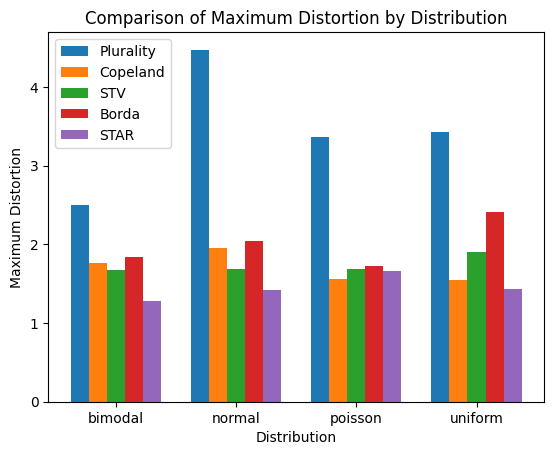

In [25]:

# Extract the data
distribution = group_by_distribution.index
plurality_max = group_by_distribution["Plurality_Distortion_max"]
copeland_max = group_by_distribution["Copeland_Distortion_max"]
stv_max = group_by_distribution["STV_Distortion_max"]
borda_max = group_by_distribution["Borda_Distortion_max"]
star_max = group_by_distribution["STAR_Distortion_max"]

# Set the width of each bar
bar_width = 0.15

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Comparison of Maximum Distortion by Distribution")
plt.xticks(x, distribution)
plt.legend()

# Show the plot
plt.show()



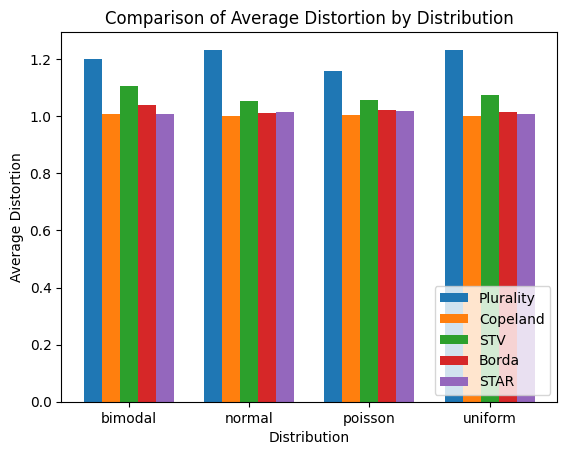

In [30]:
# Extract the data
distribution = group_by_distribution.index
plurality_avg = group_by_distribution["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution["Copeland_Distortion_avg"]
stv_avg = group_by_distribution["STV_Distortion_avg"]
borda_avg = group_by_distribution["Borda_Distortion_avg"]
star_avg = group_by_distribution["STAR_Distortion_avg"]

# Set the width of each bar
bar_width = 0.15

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Comparison of Average Distortion by Distribution")
plt.xticks(x, distribution)
plt.legend(loc='lower right')


In [35]:
group_by_m = df.groupby("m").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"))
group_by_m

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max
m,,,,,,,,,,
5,1.112359,2.378641,1.008777,1.955858,1.042976,1.688525,1.027724,2.409912,1.007898,1.583333
10,1.175162,3.363636,1.006085,1.545455,1.066891,1.691284,1.028788,1.815081,1.011514,1.600000
15,1.208279,2.838520,1.004654,1.343547,1.074297,1.639535,1.025712,1.929885,1.012535,1.666667
20,1.221790,3.000000,1.003709,1.679898,1.077483,1.897808,1.023592,1.633343,1.014163,1.421053
25,1.227848,3.138521,1.003121,1.333333,1.077976,1.594299,1.021764,1.582072,1.014043,1.434783
50,1.241824,3.350292,1.001424,1.275862,1.078687,1.731312,1.016765,1.307060,1.013118,1.407609
100,1.246485,4.473300,1.000516,1.142857,1.077630,1.655734,1.012934,1.314937,1.011954,1.295566


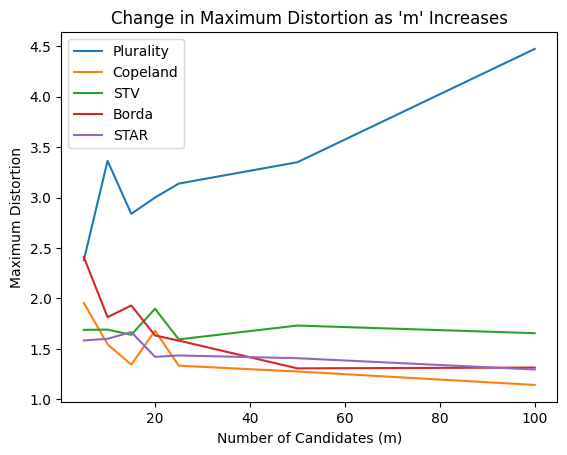

In [38]:
plt.plot(group_by_m.index, group_by_m["Plurality_Distortion_max"], label="Plurality")
plt.plot(group_by_m.index, group_by_m["Copeland_Distortion_max"], label="Copeland")
plt.plot(group_by_m.index, group_by_m["STV_Distortion_max"], label="STV")
plt.plot(group_by_m.index, group_by_m["Borda_Distortion_max"], label="Borda")
plt.plot(group_by_m.index, group_by_m["STAR_Distortion_max"], label="STAR")

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Maximum Distortion")
plt.title("Change in Maximum Distortion as 'm' Increases")
plt.legend()


# Show the plot
plt.show()

In [40]:
group_by_n = df.groupby("n").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"))
group_by_n

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max
n,,,,,,,,,,
5,1.423965,1.423965,1.000000,1.000000,1.074770,1.074770,1.000000,1.000000,1.000000,1.000000
10,1.183560,3.907165,1.010968,1.955858,1.045883,1.897808,1.023844,1.913087,1.015587,1.666667
15,1.197876,4.473300,1.002068,1.520000,1.076380,1.688525,1.024399,2.355094,1.015775,1.463415
20,1.199422,3.350292,1.005377,1.477064,1.059683,1.684487,1.022104,2.409912,1.011933,1.362041
25,1.208743,3.272262,1.001646,1.420648,1.079070,1.667179,1.021556,1.659158,1.012082,1.583333
50,1.216002,3.277040,1.002214,1.301729,1.072557,1.586387,1.020034,1.692510,1.009668,1.361582
100,1.230755,3.047314,1.001257,1.218750,1.083542,1.579310,1.022300,1.721923,1.007687,1.359081


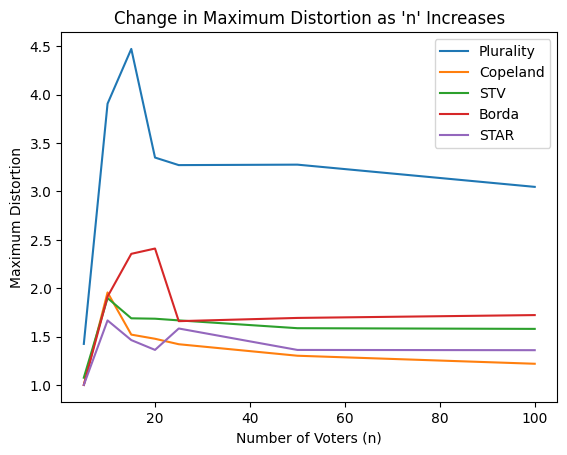

In [41]:
plt.plot(group_by_n.index, group_by_n["Plurality_Distortion_max"], label="Plurality")
plt.plot(group_by_n.index, group_by_n["Copeland_Distortion_max"], label="Copeland")
plt.plot(group_by_n.index, group_by_n["STV_Distortion_max"], label="STV")
plt.plot(group_by_n.index, group_by_n["Borda_Distortion_max"], label="Borda")
plt.plot(group_by_n.index, group_by_n["STAR_Distortion_max"], label="STAR")

# Customize the plot
plt.xlabel("Number of Voters (n)")
plt.ylabel("Maximum Distortion")
plt.title("Change in Maximum Distortion as 'n' Increases")
plt.legend()


# Show the plot
plt.show()

In [12]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_distribution = df.groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100)
).reset_index()

In [13]:
accuracy_by_distribution

,Distribution,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage
0,bimodal,8.326190,70.128571,8.066667,36.890476,27.114286
1,normal,21.670270,78.610811,28.321622,26.367568,53.970270
2,poisson,32.776190,91.940476,39.890476,24.335714,57.228571
3,uniform,20.142378,79.095736,26.258899,35.811052,51.324968


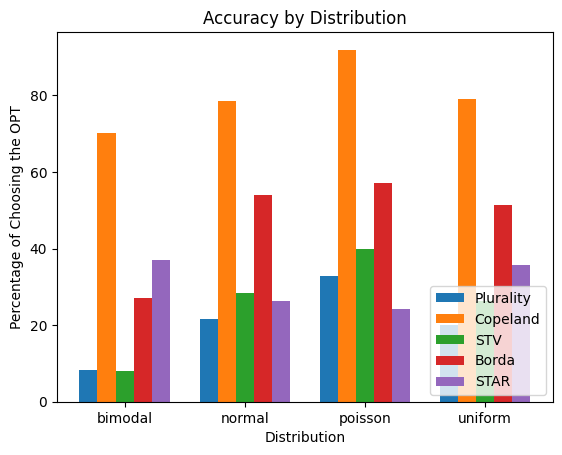

In [16]:
# Extract the data
distribution = accuracy_by_distribution["Distribution"]

# Set the width of each bar
bar_width = 0.15

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution["Borda_percentage"], width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, accuracy_by_distribution["STAR_percentage"], width=bar_width, label="STAR")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Percentage of Choosing the OPT")
plt.title("Accuracy by Distribution")
plt.xticks(x, distribution)
plt.legend(loc='lower right')


In [20]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_m = df.groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100)
)
accuracy_by_m

,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage
m,,,,,
5,40.600000,86.447826,50.682609,68.217391,73.021739
10,24.655450,82.865962,32.563802,48.471806,56.684492
15,19.095652,81.343478,25.295652,36.304348,48.913043
20,17.343478,80.073913,22.004348,28.069565,44.321739
25,16.317391,78.847826,19.530435,22.456522,41.813043
50,14.125000,76.966667,15.741667,10.475000,35.054167
100,13.366667,73.750000,13.975000,4.950000,31.845833


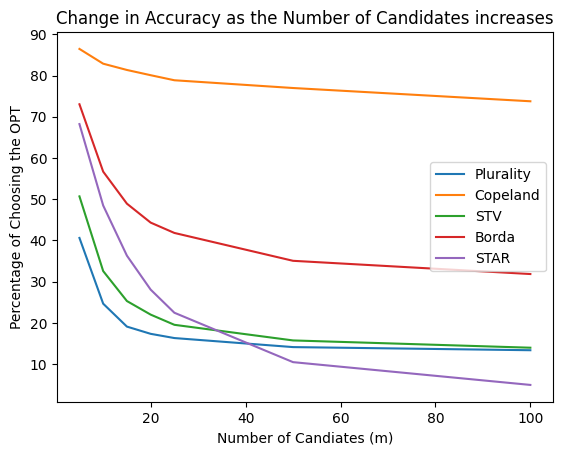

In [24]:
plt.plot(accuracy_by_m.index, accuracy_by_m["Plurality_percentage"], label="Plurality")
plt.plot(accuracy_by_m.index, accuracy_by_m["Copeland_percentage"], label="Copeland")
plt.plot(accuracy_by_m.index, accuracy_by_m["STV_percentage"], label="STV")
plt.plot(accuracy_by_m.index, accuracy_by_m["Borda_percentage"], label="Borda")
plt.plot(accuracy_by_m.index, accuracy_by_m["STAR_percentage"], label="STAR")

# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Percentage of Choosing the OPT")
plt.title("Change in Accuracy as the Number of Candidates increases")
plt.legend()


# Show the plot
plt.show()